<a href="https://colab.research.google.com/github/MoralesCMaJo/Tarea-2--An-lisis-de-series-temporales/blob/main/5_Analyzing_returns_using_the_AR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instala la biblioteca gdown si aún no la tienes
!pip install gdown

import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns

# Descarga el archivo CSV desde Google Drive
url = 'https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv'
output = 'Index2018.csv'
gdown.download(url, output, quiet=False)

# Lee el archivo CSV y divide los datos en filas utilizando punto y coma como delimitador
df_comp = pd.read_csv('Index2018.csv', delimiter=';')

# Asegúrate de que la columna 'date' sea tratada como fecha
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst=True)

# Resto del código original

# Suprime los warnings
import warnings
warnings.filterwarnings("ignore")

df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

df_comp['market_value'] = df_comp['ftse']

del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2 * (L2 - L1))
    p = chi2.sf(LR, DF).round(3)
    return p


Downloading...
From: https://drive.google.com/uc?id=1PJ2Cws4-8ohs1IwtJxyWElW13ZzXy5mv
To: /content/Index2018.csv
100%|██████████| 383k/383k [00:00<00:00, 48.2MB/s]


In [ ]:
sts.adfuller(df['market_value'])

(-1.65251205200554,
 0.45573064647726563,
 6,
 6193,
 {'1%': -3.431406355974594,
  '5%': -2.8620068149070077,
  '10%': -2.5670184827348006},
 67681.61129465637)

In [ ]:
df['returns'] = df['market_value'].pct_change(1).mul(100)
df = df.iloc[1:]


In [ ]:
sts.adfuller(df['returns'])

(-15.016471321560472,
 1.0372580059357148e-27,
 34,
 6164,
 {'1%': -3.4314113279237977,
  '5%': -2.862009011671878,
  '10%': -2.5670196521269593},
 18855.59403362416)

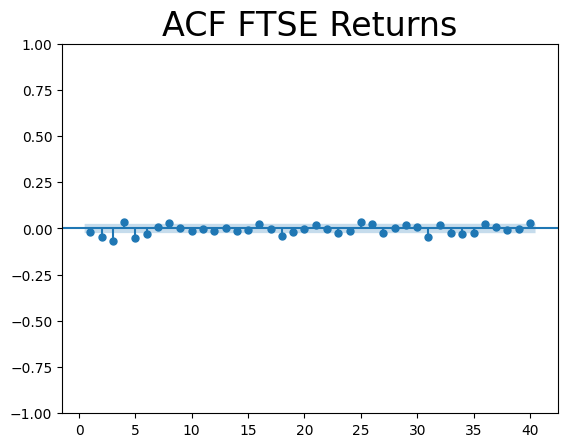

In [ ]:
sgt.plot_acf(df['returns'], lags=40, zero=False)
plt.title("ACF FTSE Returns", size=24)
plt.show()

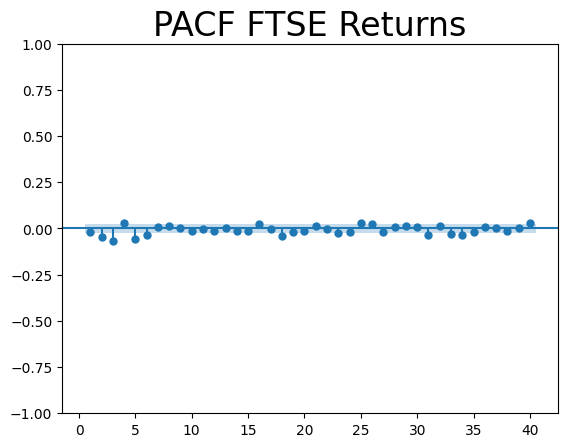

In [ ]:
sgt.plot_pacf(df['returns'], lags=40, zero=False, method='ols')
plt.title("PACF FTSE Returns", size=24)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo ARIMA(1, 0, 0) para los retornos
model_ret_ar_1 = ARIMA(df['returns'], order=(1, 0, 0))
results_ret_ar_1 = model_ret_ar_1.fit()
print("Resumen del Modelo ARIMA(1,0,0) para los retornos:")
print(results_ret_ar_1.summary())

Resumen del Modelo ARIMA(1,0,0) para los retornos:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9511.637
Date:                Sat, 14 Oct 2023   AIC                          19029.274
Time:                        18:14:29   BIC                          19049.471
Sample:                    01-10-1994   HQIC                         19036.276
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.336      0.182      -0.009       0.047
ar.L1         -0.0175      0.008     -2.316      0.021      -0.032      -0.003
s

In [ ]:
# Modelo ARIMA(2, 0, 0) para los retornos
model_ret_ar_2 = ARIMA(df['returns'], order=(2, 0, 0))
results_ret_ar_2 = model_ret_ar_2.fit()
print("Resumen del Modelo ARIMA(2,0,0) para los retornos:")
print(results_ret_ar_2.summary())

Resumen del Modelo ARIMA(2,0,0) para los retornos:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9504.351
Date:                Sat, 14 Oct 2023   AIC                          19016.702
Time:                        18:15:02   BIC                          19043.631
Sample:                    01-10-1994   HQIC                         19026.038
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.392      0.164      -0.008       0.046
ar.L1         -0.0184      0.008     -2.401      0.016      -0.033      -0.003
a

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo ARIMA(1, 0, 0) para los retornos
model_ret_ar_1 = ARIMA(df['returns'], order=(1, 0, 0))
results_ret_ar_1 = model_ret_ar_1.fit()
print("Resumen del Modelo ARIMA(1,0,0) para los retornos:")
print(results_ret_ar_1.summary())

Resumen del Modelo ARIMA(1,0,0) para los retornos:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9511.637
Date:                Sat, 14 Oct 2023   AIC                          19029.274
Time:                        18:15:42   BIC                          19049.471
Sample:                    01-10-1994   HQIC                         19036.276
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.336      0.182      -0.009       0.047
ar.L1         -0.0175      0.008     -2.316      0.021      -0.032      -0.003
s

In [ ]:
# Función para el LLR test
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2 * (L2 - L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
# Modelo ARIMA(2, 0, 0) para los retornos
model_ret_ar_2 = ARIMA(df['returns'], order=(2, 0, 0))
results_ret_ar_2 = model_ret_ar_2.fit()
print("Resumen del Modelo ARIMA(2,0,0) para los retornos:")
print(results_ret_ar_2.summary())

Resumen del Modelo ARIMA(2,0,0) para los retornos:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9504.351
Date:                Sat, 14 Oct 2023   AIC                          19016.702
Time:                        18:16:35   BIC                          19043.631
Sample:                    01-10-1994   HQIC                         19026.038
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.392      0.164      -0.008       0.046
ar.L1         -0.0184      0.008     -2.401      0.016      -0.033      -0.003
a

In [ ]:
# Prueba de razón de verosimilitud entre ARIMA(1,0,0) y ARIMA(2,0,0)
LLR_1_2 = LLR_test(model_ret_ar_1, model_ret_ar_2)
print(f"LLR test entre ARIMA(1,0,0) y ARIMA(2,0,0): {LLR_1_2}")

LLR test entre ARIMA(1,0,0) y ARIMA(2,0,0): 0.0


In [ ]:
# Repite el proceso para modelos ARIMA(3,0,0) a ARIMA(7,0,0)
orders = [3, 4, 5, 6, 7]
for p in orders:
    model_ret_ar = ARIMA(df['returns'], order=(p, 0, 0))
    results_ret_ar = model_ret_ar.fit()
    print(f"Resumen del Modelo ARIMA({p},0,0) para los retornos:")
    print(results_ret_ar.summary())

    if p < 7:
        LLR = LLR_test(ARIMA(df['returns'], order=(p, 0, 0)), ARIMA(df['returns'], order=(p+1, 0, 0)))
        print(f"LLR test entre ARIMA({p},0,0) y ARIMA({p+1},0,0): {LLR}")

Resumen del Modelo ARIMA(3,0,0) para los retornos:
                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6199
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -9490.170
Date:                Sat, 14 Oct 2023   AIC                          18990.340
Time:                        18:17:22   BIC                          19024.001
Sample:                    01-10-1994   HQIC                         19002.010
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.457      0.145      -0.007       0.045
ar.L1         -0.0217      0.008     -2.775      0.006      -0.037      -0.006
a

Normalizing Values

In [ ]:
# Normalización del valor de mercado
benchmark = df['market_value'].iloc[0]
df['norm'] = df['market_value'].div(benchmark).mul(100)

In [ ]:
# Prueba de Dickey-Fuller aumentada para la serie normalizada
sts.adfuller(df['norm'])

(-1.641805223132514,
 0.46131766759330184,
 6,
 6192,
 {'1%': -3.4314065266455214,
  '5%': -2.862006890314898,
  '10%': -2.567018522876271},
 24052.378070390532)

In [ ]:
# Normalización de los retornos
bench_ret = df['returns'].iloc[0]
df['norm_ret'] = df['returns'].div(bench_ret).mul(100)

# Prueba de Dickey-Fuller aumentada para la serie de retornos normalizada
sts.adfuller(df['norm_ret'])

(-15.016471321560552,
 1.0372580059354626e-27,
 34,
 6164,
 {'1%': -3.4314113279237977,
  '5%': -2.862009011671878,
  '10%': -2.5670196521269593},
 98476.7791580395)

Normalized Returns

In [ ]:
# Modelo ARIMA(1, 0, 0) para los retornos normalizados
model_norm_ret_ar_1 = ARIMA(df['norm_ret'], order=(1, 0, 0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
print("Resumen del Modelo ARIMA(1,0,0) para los retornos normalizados:")
print(results_norm_ret_ar_1.summary())

Resumen del Modelo ARIMA(1,0,0) para los retornos normalizados:
                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 6199
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -49548.279
Date:                Sat, 14 Oct 2023   AIC                          99102.559
Time:                        18:35:57   BIC                          99122.755
Sample:                    01-10-1994   HQIC                         99109.561
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1060      9.061     -1.336      0.182     -29.865       5.653
ar.L1         -0.0176      0.008     -2.316      0.021      -0.032 

In [ ]:
# Modelo ARIMA(2, 0, 0) para los retornos normalizados
model_norm_ret_ar_2 = ARIMA(df['norm_ret'], order=(2, 0, 0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
print("Resumen del Modelo ARIMA(2,0,0) para los retornos normalizados:")
print(results_norm_ret_ar_2.summary())

Resumen del Modelo ARIMA(2,0,0) para los retornos normalizados:
                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 6199
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -49540.994
Date:                Sat, 14 Oct 2023   AIC                          99089.987
Time:                        18:36:39   BIC                          99116.916
Sample:                    01-10-1994   HQIC                         99099.323
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1060      8.702     -1.391      0.164     -29.161       4.949
ar.L1         -0.0184      0.008     -2.399      0.016      -0.033 

In [ ]:
# Modelo ARIMA(7, 0, 0) para los retornos normalizados
model_norm_ret_ar_7 = ARIMA(df['norm_ret'], order=(7, 0, 0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
print("Resumen del Modelo ARIMA(7,0,0) para los retornos normalizados:")
print(results_norm_ret_ar_7.summary())

Resumen del Modelo ARIMA(7,0,0) para los retornos normalizados:
                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 6199
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -49509.348
Date:                Sat, 14 Oct 2023   AIC                          99036.696
Time:                        18:42:56   BIC                          99097.285
Sample:                    01-10-1994   HQIC                         99057.702
                         - 10-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1060      8.058     -1.502      0.133     -27.899       3.687
ar.L1         -0.0197      0.008     -2.401      0.016      -0.036 

Analyzing the residuals


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Modelo ARIMA(6, 0, 0) para los retornos normalizados
model_ret_ar_6 = ARIMA(df['norm_ret'], order=(6, 0, 0))
results_ret_ar_6 = model_ret_ar_6.fit()

In [ ]:
# Cálculo de los residuos
df['res_ret'] = results_ret_ar_6.resid

In [ ]:
# Media de los residuos
mean_res_ret = df['res_ret'].mean()
print(f"Media de los residuos: {mean_res_ret}")

Media de los residuos: 0.010974259831374277


In [ ]:
# Varianza de los residuos
var_res_ret = df['res_ret'].var()
print(f"Varianza de los residuos: {var_res_ret}")

Varianza de los residuos: 506701.7324967502


In [ ]:
# Prueba de Dickey-Fuller aumentada para los residuos
adf_res_ret = sts.adfuller(df['res_ret'])
print("Resultado de la Prueba de Dickey-Fuller Aumentada para los residuos:")
print(adf_res_ret)

Resultado de la Prueba de Dickey-Fuller Aumentada para los residuos:
(-14.8707826133391, 1.664626274550529e-27, 34, 6164, {'1%': -3.4314113279237977, '5%': -2.862009011671878, '10%': -2.5670196521269593}, 98478.50557872414)


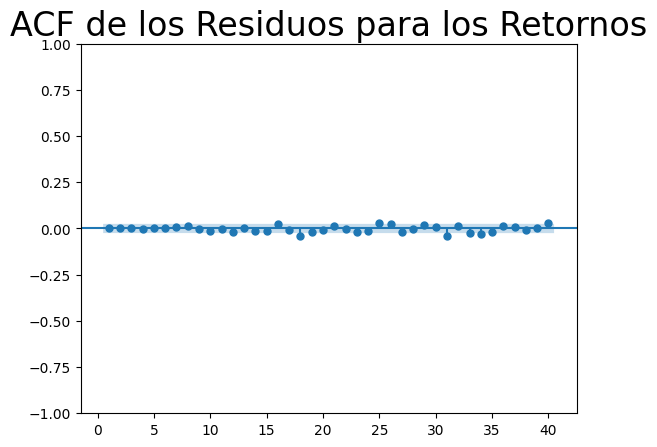

In [ ]:
# Gráfico de la función de autocorrelación de los residuos
sgt.plot_acf(df['res_ret'], zero=False, lags=40)
plt.title("ACF de los Residuos para los Retornos", size=24)
plt.show()

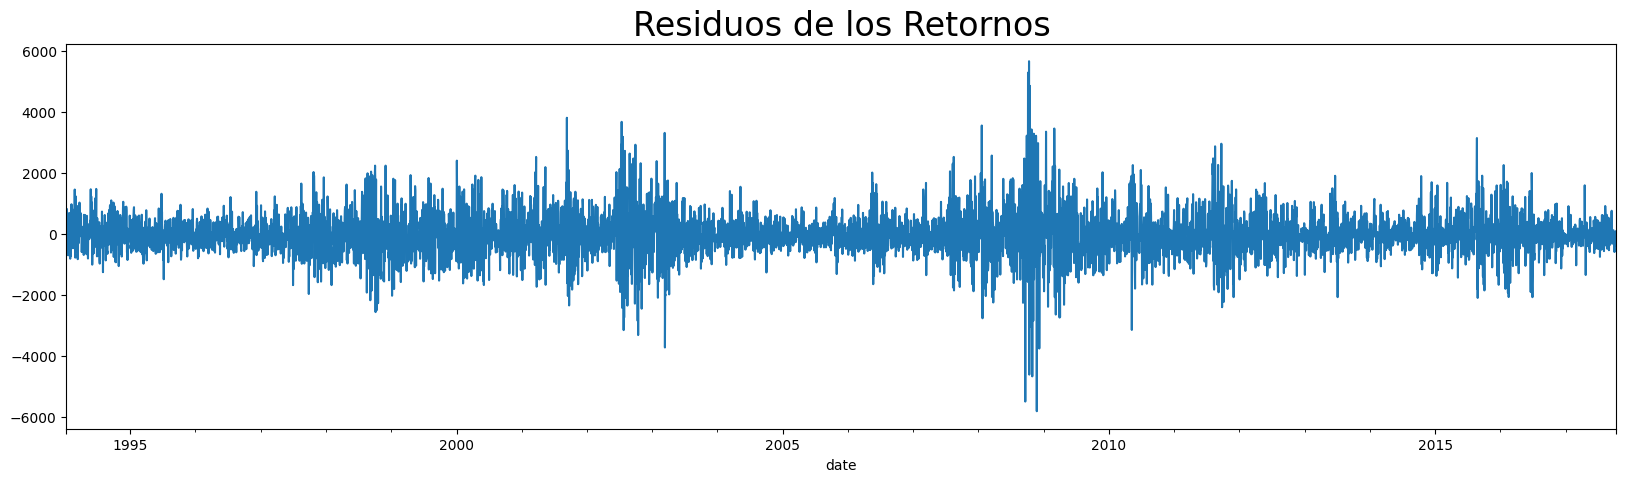

In [ ]:
# Gráfico de los residuos
df['res_ret'].plot(figsize=(20, 5))
plt.title("Residuos de los Retornos", size=24)
plt.show()